# Homework 3 for DSE 220: Machine Learning
1.	Train decision tree, forests of randomized trees and Boosting trained on the Titanic Data Set.  Perform and plot the decision surface for each.   Don’t forget to perform data prep. (Hint: Kaggle has a nice description- https://www.kaggle.com/c/titanic).  


Several different configuration of each of the models/parameters should be explored, analyzed and plotted.  Demonstrate how changes in parameters influences accuracy for different algorithms. Describe your process of parameter tuning and provide in detailed discussion of the results.  

In [10]:
import csv as csv 
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.cross_validation import train_test_split
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import grid_search
from scipy.stats import pointbiserialr, spearmanr
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv', sep=',', engine='python')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Drop cabin becasue it has mostly NANs, drop ticket because it doesnt present any real value
del train['Ticket']
del train['Cabin']

##### We can pull out all of the titles to see if they have an effect  on the outcome

In [4]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    } 

train['Title'] = train['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [49]:
# use get dummies for to change the graph to binary or numericn values
# drop cabin and ticket, pull out title
sex=pd.get_dummies(train['Sex'], dummy_na=True)
embarked=pd.get_dummies(train['Embarked'], dummy_na=True)
title=pd.get_dummies(train['Title'], dummy_na=True)

#concat numeric data frames with original 
frames = [train, sex, embarked, title]
result = pd.concat(frames)
binary = pd.concat(frames, axis=1)

#drop old categorical columns
del binary['Name']
del binary['Sex']
del binary['Embarked']
del binary['Title']

#fill Nan values
new_binary=binary.apply(lambda x: x.fillna(x.mean()),axis=0)

new_binary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,nan,...,Q,S,nan,Master,Miss,Mr,Mrs,Officer,Royalty,nan
0,1,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,6,0,3,29.699118,0,0,8.4583,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,7,0,1,54.000000,0,0,51.8625,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8,0,3,2.000000,3,1,21.0750,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,1,3,27.000000,0,2,11.1333,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,10,1,2,14.000000,1,0,30.0708,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
new_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
female         891 non-null float64
male           891 non-null float64
nan            891 non-null float64
C              891 non-null float64
Q              891 non-null float64
S              891 non-null float64
nan            891 non-null float64
Master         891 non-null float64
Miss           891 non-null float64
Mr             891 non-null float64
Mrs            891 non-null float64
Officer        891 non-null float64
Royalty        891 non-null float64
nan            891 non-null float64
dtypes: float64(16), int64(5)
memory usage: 146.2 KB


# Select best k for feature selection, skikit_learn.feature_selection
#### Use forward feature selection to get the most important figures
Spearman_rank
Point_biserial

In [6]:
X = new_binary.iloc[:, 2:]
y = new_binary['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

# Decision Trees

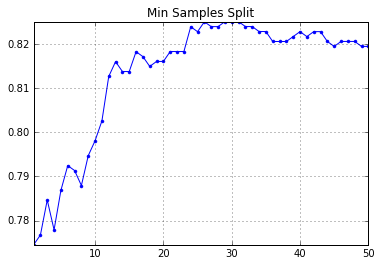

In [13]:

feature_param = range(1,51)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(min_samples_split =feature)
    clf.fit(X_train,y_train)
    scoreCV = sklearn.cross_validation.cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Decision Tree - Min Samples Split')
plt.grid();


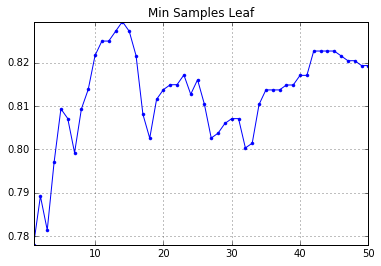

In [15]:
#Min Samples Leaf
feature_param = range(1,51)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(min_samples_leaf =feature)
    clf.fit(X_train,y_train)
    scoreCV = sklearn.cross_validation.cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Decision Tree - Min Samples Leaf')
plt.grid();

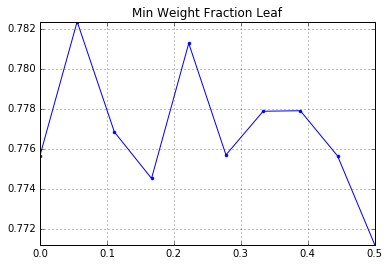

In [16]:
#Min Weight Fraction Leaf
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(min_weight_fraction_leaf =feature)
    clf.fit(X_train,y_train)
    scoreCV = sklearn.cross_validation.cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Decision Tree - Min Weight Fraction Leaf')
plt.grid();

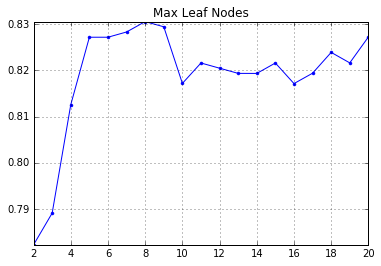

In [17]:
#Max Leaf Nodes
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(max_leaf_nodes=feature)
    clf.fit(X_train,y_train)
    scoreCV = sklearn.cross_validation.cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Decision Tree - Max Leaf Nodes')
plt.grid();

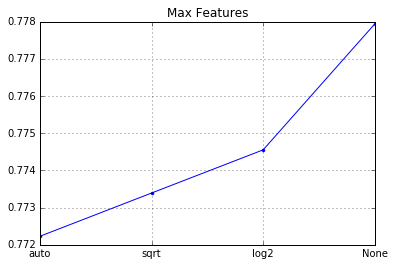

In [18]:
#Max Features
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(max_features=feature)
    clf.fit(X_train,y_train)
    scoreCV = sklearn.cross_validation.cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(scores, '.-')
plt.title('Decision Tree - Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

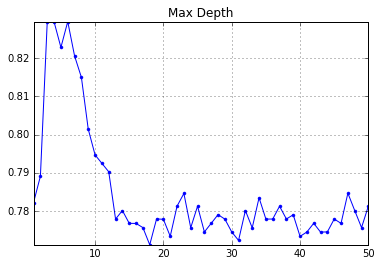

In [20]:
#Max Depth
feature_param = range(1,51)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scoreCV = sklearn.cross_validation.cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Decision Tree - Max Depth')
plt.grid();

# Decision Tree Discussion: 
We see that for the best scenario, sample split of around 20 seams to be the best.  This is because the error curve tends to flatten at this location so that if any additional samples are taken it does not make that much a difference in error. For minimum samples was around 15. Minimum weight fraction jumped up and down, but had the best rate around .05.  Max leaf nodes had the lowest error around 8 leaf nodes. The max features tended upwards from auto to none. The best max depth scenario for the decisions trees was found to be around a depth of 5 to 7.  Using all of these scores we can combine the most optimal parameters to get the high accuracy with the lowest error rate on our classifier. 


# Random Forest Classifier

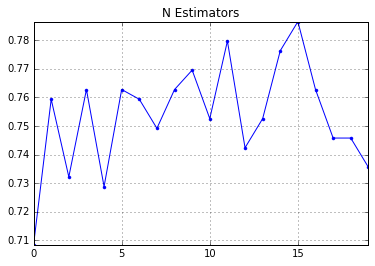

In [23]:
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')

plt.title('Random Forest - N Estimators')
plt.grid();

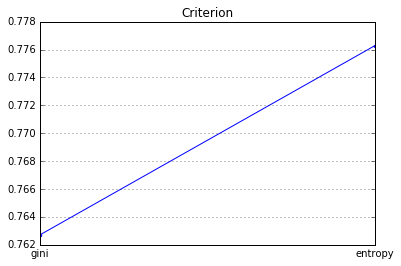

In [22]:
#Criterion
feature_param = ['gini','entropy']
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(criterion=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')

plt.title('Random Forest - Criterion')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

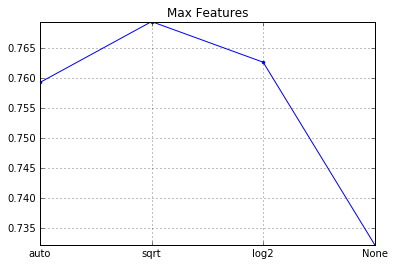

In [25]:
#Max Features
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_features=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Random Forest - Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();


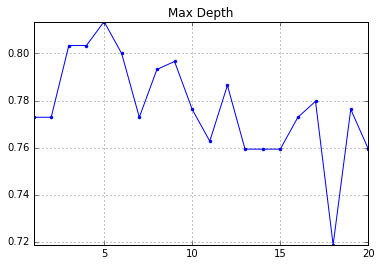

In [26]:

#Max Depth
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')

plt.title('Random Forest - Max Depth')
plt.grid();

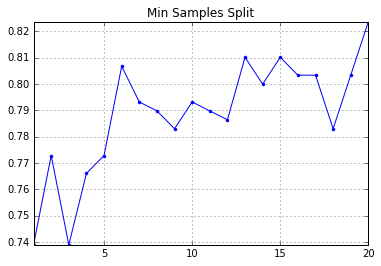

In [27]:
#Min Samples Split
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_samples_split =feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')

plt.title('Random Forest - Min Samples Split')
plt.grid();

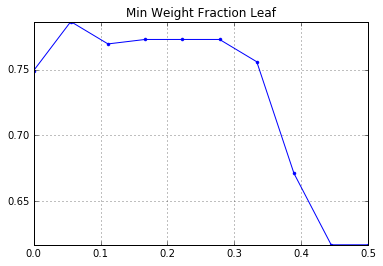

In [28]:
#Min Weight Fraction Leaf
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_weight_fraction_leaf =feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')

plt.title('Random Forest - Min Weight Fraction Leaf')
plt.grid();

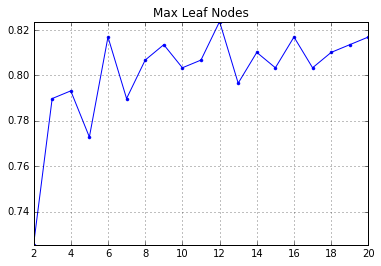

In [30]:
#Max Leaf Nodes
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_leaf_nodes=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')

plt.title('Random Forest - Max Leaf Nodes')
plt.grid();

# Discussion For Random Forest: 
Discussion For Random Forest: The random forest classifier had its lowest error rate at 15 n-estimators.  Max features was fond to best the most optimal when the max features are set at sqrt. The best max depth was found at 5 with a error or less that 15%.   The error for the minimum was found to decrease as higher level of sample split were used. Max leaf nodes was found to be pretty consistent across the board, with anything greater than 6 having the lowest error.


# Gradient Boosting

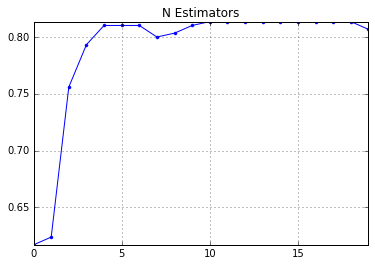

In [32]:
#N Estimators
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(n_estimators=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Gradient Boosting - N Estimators')
plt.grid();

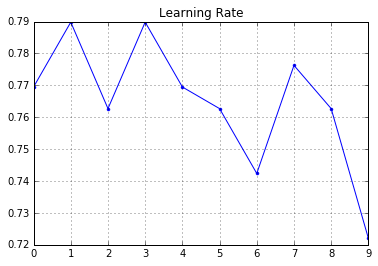

In [33]:
#Learning Rate
feature_param = np.linspace(0.1,1,10)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(learning_rate=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.title('Gradient Boosting - Learning Rate')
plt.grid();

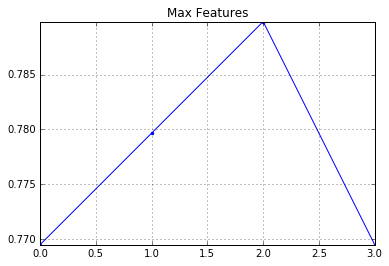

In [34]:
#Max Features
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(max_features=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Gradient Boosting - Max Features')
plt.grid();

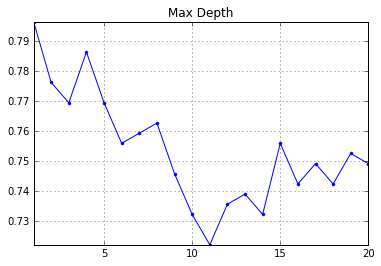

In [35]:

#Max Depth
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Gradient Boosting - Max Depth')
plt.grid();

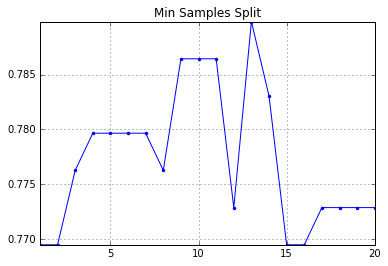

In [36]:
#Min Samples Split
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(min_samples_split =feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Gradient Boosting - Min Samples Split')
plt.grid();

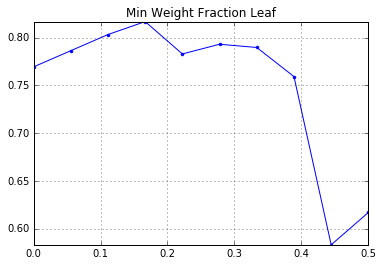

In [37]:
#Min Weight Fraction Leaf
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(min_weight_fraction_leaf =feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Gradient Boosting - Min Weight Fraction Leaf')
plt.grid();

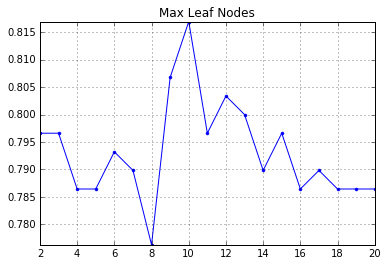

In [38]:

#Max Leaf Nodes
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(max_leaf_nodes=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Gradient Boosting - Max Leaf Nodes')
plt.grid();

# Discussion For Gradient Boosting: 

As n_estimators rises the end tends to drop off.  Anything greater than 5 is unnecessary though because there is not much difference in the output.  Learning rate error goes up as learning rate goes up.  The highest error was found at a learning rate set  to 9.  I was able to get lowest error on max features around 2.0.  Max depth was found to increase errors more as depth increases. The best scenario for sample split is located at 12-13 samples splits.  The min weight fraction leaf was best between 0.0 and 0.4. Max leaf nodes were best at 10 max leaf nodes.  


In [48]:
X = train[['Age', 'Fare']].values
y = train['Survived'].values
X

array([[ 22.    ,   7.25  ],
       [ 38.    ,  71.2833],
       [ 26.    ,   7.925 ],
       ..., 
       [     nan,  23.45  ],
       [ 26.    ,  30.    ],
       [ 32.    ,   7.75  ]])

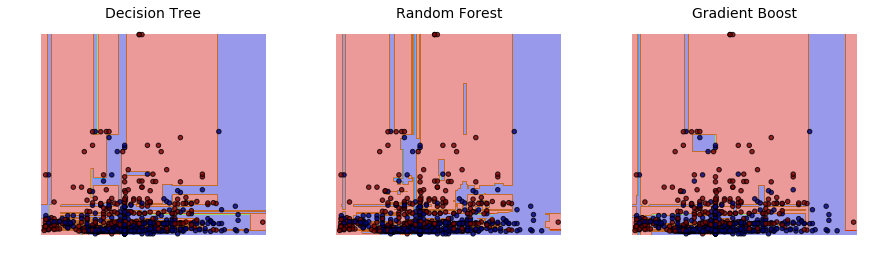

In [62]:
 
from itertools import product

X = new_binary[['Age', 'Fare']].values
y = new_binary['Survived'].values

clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier()


clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,4))

for idx, clf, tt in zip(range(3),
                        [clf1, clf2, clf3],
                        ['Decision Tree', 'Random Forest',
                         'Gradient Boost']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx].set_title(tt, fontsize=14)
    axarr[idx].axis('off')